<a href="https://colab.research.google.com/github/DiegoRInacio/Analise_de_dados/blob/main/Analise_com_Pandas_e_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Análise usando Pandas e Numpy

![pesquisa](imagens/pesquisa.png)
***

__Exercício 1:__ Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.

**Etapas desse projeto:**

- [1 - Carregar os dados titanic.csv;](#s1) <br>
- [2 - Analisar a tabela;](#s2) <br>
- [3 - Estudar a relação entre as variáveis survived e sex;](#s3) <br>
    - [3.1 - Criar diferentes gráficos](#s4) <br>
    - [3.2 - Calcular chi-quadrado](#s5) <br>

***
__Exercício 2:__ Use o dataframe df, carregado abaixo, onde cada observação corresponde a uma reclamação feita pelo consumidor, para responder as perguntas abaixo:


- [1 - Qual o número de reclamações por Estado?](#s6) <br>

    - Calcular a quantidade de reclamações de acordo com os estados.

- [2 - Qual a quantidade de reclamações por sexo?](#s7) <br>

    - Calcular a quantidade de reclamações de acordo com o sexo do consumidor.

- [3 - O tempo de resposta tem alguma correlação com a nota do consumidor?](#s8) <br>

    - Verificar a correlação entre o tempo de resposta e a nota atribuída pelo consumidor.
    - Importante verificar qual o tipo das duas variáveis para determinar o método estatístico.
    - Lembre-se que aqui você estará testando a seguinte hipótese: 
    
        - h0 = o tempo de resposta tem relação direta com a nota do consumidor. (Hipótese nula)
        - h1 = o tempo de resposta não tem relação direta com a nota do consumidor. (Hipótese alternativa)

- [4 - Proporção de reclamações registradas e não respondidas.](#s9) <br>

    - Calcular a proporção (porcentagem) do total de reclamações registradas que não foram respondidas.

- [5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. ](#s10) <br>

    - Proponha outras hipóteses e verifique-as (no mínimo duas).


**Importante**: É interessante que as análises contenham gráficos! No dia-a-dia de um cientista, grande parte do  trabalho é analisar dados e gerar visualizações para apresentá-las.


_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).
***

### Definindo as Bibliotécas

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<a id="s1"> <h2>1 - Carregando os dados titanic.csv </h2></a> 

In [ ]:
df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Legenda em português de cada dado

    - PassengerId = ID_Passageiro
    - Survived = 1 (Sobreviveu), 0 (Não Sobreviveu)
    - PClass = Tipo de classe, possuí três valores sendo a 1 a melhor e a 3 a pior classe
    - Name = Nome do Passageiro
    - Sex = Sexo do passageiro (M e F)
    - Age = Idade do passageiro na data do naufrágio
    - SibSP = Número de irmão / cônjuges a bordo
    - Parch = Número de pais / filhos a bordo
    - Ticket = Código do ticket
    - Fare = Valor da passagem
    - Cabin = Código da cabine
    - Embarked = Local de embarque

<a id="s2"> <h2>2 - Analisando a Tabela / DataFrame </h2></a> 

Probabilidade de sobreviver independente do sexo

In [ ]:
df_sex = pd.DataFrame(df.Sex.value_counts())
df_sex.rename(columns = {'Sex': 'F_Absoluta'}, inplace = True)
df_sex['F_Relativa'] = round(df_sex.F_Absoluta / df_sex.F_Absoluta.sum(),2)


In [ ]:
df_sex

,F_Absoluta,F_Relativa
male,577,0.65
female,314,0.35


In [ ]:
round(df.Survived.value_counts()/df.Survived.shape[0],2)

0    0.62
1    0.38
Name: Survived, dtype: float64

***
<a id="s3"> <h2>3 - Estudando a relação das Variáveis Survived e Sex </h2></a> 

In [ ]:
proba_h = df[(df.Survived == 1) & (df.Sex == 'male')].shape[0] / df[df.Sex == 'male'].shape[0]
proba_m = df[(df.Survived == 1) & (df.Sex == 'female')].shape[0] / df[df.Sex == 'female'].shape[0]

print('A probabilidade de sobrevivência de homens é : {:.2f}%\n'
      'E a probabilidade de sobrevivência de mulheres é: {:.2f}%'.format(round(proba_h,2)*100, round(proba_m,2)*100))


A probabilidade de sobrevivência de homens é : 19.00%
E a probabilidade de sobrevivência de mulheres é: 74.00%


***
#### De acordo com os dados acima podemos concluír que:

##### Podemos definir que a taxa de sobrevivência tem relação com o sexo, pois, quando a analise é relaciona ao sexo a taxa de sobrevivência das mulheres é maior que a dos homenes.

***
<a id="s4"> <h2>3.1 - Criando Gráficos diferentes para representar a relação entre as variáveis Survived e Sex </h2></a> 

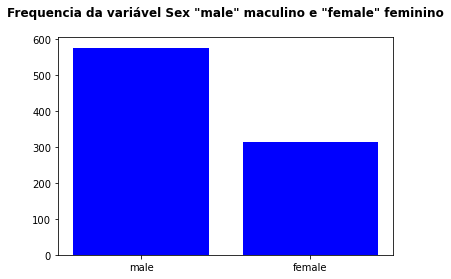

In [ ]:
plt.bar(df.Sex.unique(), df.Sex.value_counts(), color = 'blue')
plt.title('Frequencia da variável Sex "male" maculino e "female" feminino\n', {'fontsize': 12, 'fontweight': 'bold'})
plt.show()


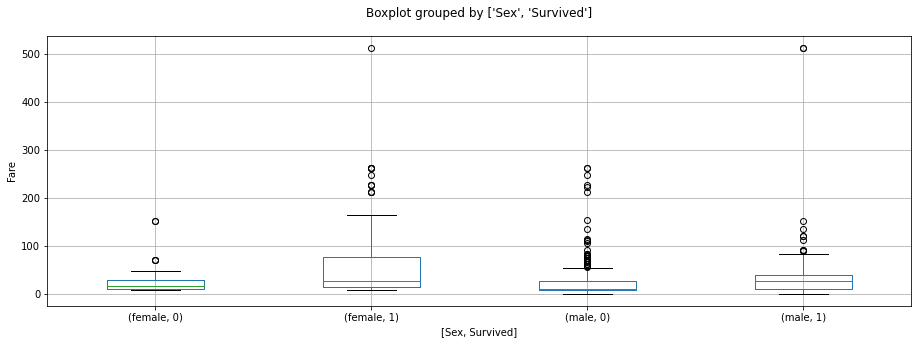

In [ ]:
df.boxplot('Fare', by = ['Sex', 'Survived'], figsize = [15, 5])
plt.ylabel('Fare')
plt.title('')
plt.show()


In [ ]:
#Gerando tabela de frequência absoluta e relativa
df.groupby(['Sex']).apply(lambda x: x.Survived.value_counts()).unstack()

,0,1
Sex,,
female,81,233
male,468,109


In [ ]:
#Gerando tabela de frequência relativa
df.groupby(['Sex']).apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


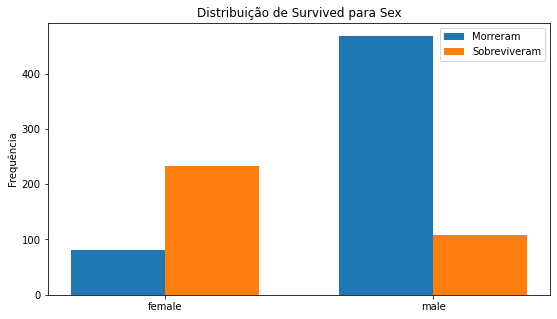

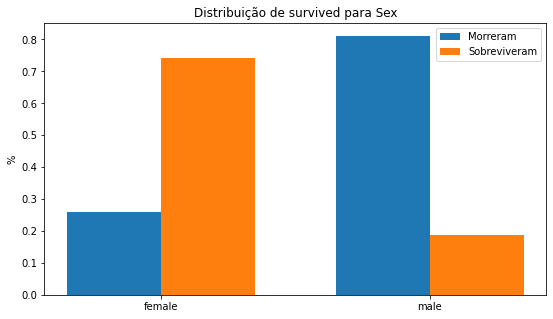

In [ ]:
#Gerando gráfico que apresenta os resultados de absolutos e relativos

df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack() #frequencia absoluta

df_sex_pro = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack() #frequencia relativa

labels = list(df_sex.index) #labels do gráfico  de barras

morreram = df_sex[0].values #Valores de quem morreu para o gráfico de barras
sobreviveram = df_sex[1].values #valores de quem sobreviveu para o gráfico de barras

morreram_pro = df_sex_pro[0].values #Valores de quem morreu da variavel probabilidade/relativa para construção do gráfico
sobreviveram_pro = df_sex_pro[1].values #Valores de quem sobreviveu da varivavel proba./relativa para construção do gráfico

x = np.arange(len(labels)) #Localização dos labels
width = 0.35 #largura das barras

fig, ax = plt.subplots(figsize = [9, 5]) #construção de fame, criando figura de eixos

rects1 = ax.bar(x - width/2, morreram, width, label = 'Morreram') #Valores para construção do gráfico de barras morreram
rects2 = ax.bar(x + width/2, sobreviveram, width, label = 'Sobreviveram') #para cosntrução do gráfico de barras sobreviveram 

#Criando titulo, legenda nos eixos e no gráfico
ax.set_title('Distribuição de Survived para Sex')
ax.set_ylabel('Frequência') #Legenda de y
ax.set_xticks(x) #set a posição das labels
ax.set_xticklabels(labels) #Legenda dos label do eixo x
ax.legend() #Legenda do gráfico
plt.show()

fig, ax1 = plt.subplots(figsize = [9, 5])
rects3 = ax1.bar(x - width/2, morreram_pro, width, label = 'Morreram')
rects4 = ax1.bar(x + width/2, sobreviveram_pro, width, label = 'Sobreviveram')

ax1.set_title('Distribuição de survived para Sex')
ax1.set_ylabel('%')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Probability'>

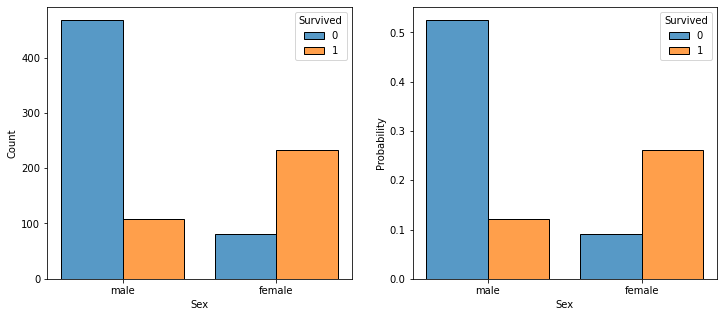

In [ ]:
# Maneira alternativa indicado pela Jéssica usando a biblioteca seaborn - FORMA NOVA!

import seaborn as sns

#seaborn é uma biblioteca muito útil para o dia a dia do cientista de dados.
# ele possui diferentes tipos de gráficos para visualização estatística.

# ref.: https://seaborn.pydata.org/

fig, axs = plt.subplots(1,2, figsize=[12,5])

sns.histplot(df, x='Sex', hue='Survived', stat='count', multiple='dodge', shrink=0.8, ax=axs[0])

#stat='count' : conta a quantidade de cada sexo de acordo com a sobrevivencia

sns.histplot(df, x='Sex', hue='Survived', stat='probability', multiple='dodge', shrink=0.8, ax=axs[1])

#stat='probability' : calcula a probabilidade de cada sexo de acordo com a sobrevivencia

***
#### De acordo com os dados acima podemos concluír que:

##### Os gráficos ratificão o que as taxas apresentam no primeiro item que a taxa de sobrevivência tem relação com o sexo, pois, quando a analise é relaciona ao sexo a taxa de sobrevivência das mulheres é maior que a de homenes, e analisando com a variavel Fare podemos ver que as mulheres que mais sobreviveram foram as ques estão atreladas as passagens de valores mais alto, o mesmo comportamento acontece com os homens, sendo que a taxa de sobrevivencia de homens é menor também.

***
<a id="s5"> <h2>3.2 - Calculando o chi-quadrado de person </h2></a> 

1) obter a distribuicao geral da variavel Survived;

2) obter a tabela de frequencia para os dados observados:

    - tabela de frequencia absoluta;
    - tabela de frequencia relativa.

3) adicionar o total na tabela de frequencia absoluta;

4) obter a tabela de frequência esperada:

    - caso as duas variáveis não tivesse relação.
    
5) cálculo do chi-quadrado:

Observado menos o esperado - desvio: $o_i - e_i$
    
Desvio ao quadrado: $\sigma^2 = (o_i - e_i)^2$

Chi-quadrado: $X^2 = (o_i - e_i)^2 / e_i$


In [ ]:
#1) Realizando a distribuição da variável Survived como

dist_geral = pd.DataFrame(round(df.Survived.value_counts()/df.shape[0],2))

dist_geral

,Survived
0,0.62
1,0.38


In [ ]:
#2) Realizando a Tabela de frequência absoluta e relativa

df_sex = df.groupby(['Sex']).apply(lambda x: x.Survived.value_counts()).unstack()

df_sex_pro = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]*100).unstack()

print(df_sex)
print('-'*100)
print(df_sex_pro)

          0    1
Sex             
female   81  233
male    468  109
----------------------------------------------------------------------------------------------------
                0          1
Sex                         
female  25.796178  74.203822
male    81.109185  18.890815


In [ ]:
#3) Adicionar o total para cada sexo na tabela de frequência absoluta

df_sex['total'] = df_sex[[0]].values + df_sex[[1]].values

df_sex

,0,1,total
Sex,,,
female,81,233,314
male,468,109,577


In [ ]:
#4) Realizando a tabela de frequência esperada:

esp_0 = df_sex.total.values * dist_geral.iloc[0].values
esp_1 = df_sex.total.values * dist_geral.iloc[1].values

df_esp = pd.DataFrame(np.c_[esp_0, esp_1])

df_esp

,0,1
0,194.68,119.32
1,357.74,219.26


In [ ]:
#5) Calculando o chi-Quadrado

# calculo dos desvios

desvios = (df_sex.iloc[:,:2].values - df_esp.values)
print(desvios)

desvio_ao_quadrado = desvios**2

chi_quad = sum(sum(desvio_ao_quadrado/df_esp.values))

print('\nChi quadrado de person é de: {:.2f} o que indica uma boa relação entre as variáveis!'.format(chi_quad))


[[-113.68  113.68]
 [ 110.26 -110.26]]

Chi quadrado de person é de: 264.12 o que indica uma boa relação entre as variáveis!


#### De acordo com os dados acima podemos concluír que:

##### O teste do Chi quadrado nos mostra que o valor encontrado é chi quadrado de pearson comprova que as variáveis possuem uma boa relação, sendo assim é uma ótima decisão usar a variável Sex para explicar as ocorrencias/comportamento da variável Survived no caso.
***

### Exercício 2: Use o dataframe df, carregado abaixo, onde cada observação corresponde a uma reclamação feita pelo consumidor, para responder as perguntas abaixo:

In [ ]:
df_gov = pd.read_csv('dadosgovbr---2014.csv', sep = ';', encoding = 'latin-1')

df_gov.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


In [ ]:
df_gov.dtypes

Gestor                     object
Canal de Origem            object
Região                     object
UF                         object
Cidade                     object
Sexo                       object
Faixa Etária               object
Ano Abertura                int64
Mês Abertura                int64
Data Abertura              object
Hora Abertura              object
Data Resposta              object
Hora Resposta              object
Data Análise               object
Hora Análise               object
Data Recusa                object
Hora Recusa                object
Data Finalização           object
Hora Finalização           object
Prazo Resposta             object
Prazo Analise Gestor      float64
Tempo Resposta            float64
Nome Fantasia              object
Segmento de Mercado        object
Área                       object
Assunto                    object
Grupo Problema             object
Problema                   object
Como Comprou Contratou     object
Procurou Empre

<a id="s6"> <h2>1 - Definindo o número de reclamação por Estado </h2></a> 
   - Calcular o número de reclamações de acordo com os Estados

In [ ]:
print('O número de reclamações por Estados é:\n{}'.format(df_gov.UF.value_counts()))

O número de reclamações por Estados é:
SP    11882
PR     6140
RJ     4907
MG     4186
BA     2443
RS     1941
DF     1805
PE     1626
SC     1458
MA     1082
ES     1081
CE     1068
MT     1012
GO      886
MS      531
AC      449
PB      343
AM      291
PA      211
RN      160
RO      119
AL      104
SE       97
PI       77
TO       46
RR       24
AP       18
Name: UF, dtype: int64


<a id="s7"> <h2>2 - Definindo o número de reclamação por Sexo </h2></a> 
   - Calcular o número de reclamações de acordo com o Sexo

In [ ]:
print('Onúmero de reclamações por sexo é de:\n{}'.format(df_gov.Sexo.value_counts()))

Onúmero de reclamações por sexo é de:
M    27895
F    16092
Name: Sexo, dtype: int64


***
<a id="s8"> <h2>3 - O tempo de resposta tem alguma correlação com a nota do consumidor? </h2></a> 
   - Verificar a correlação entre o tempo de resposta e a nota atribuída pelo consumidor.
   - Importante verificar qual o tipo das duas variáveis para determinar o método estatístico.
   - Lembre-se que aqui você estará testando a seguinte hipótese:
        - h0 = o tempo de resposta tem relação direta com a nota do consumidor. (Hipótese nula)
        - h1 = o tempo de resposta não tem relação direta com a nota do consumidor. (Hipótese alternativa)


In [ ]:
df_gov.columns

Index(['Gestor', 'Canal de Origem', 'Região', 'UF', 'Cidade', 'Sexo',
       'Faixa Etária', 'Ano Abertura', 'Mês Abertura', 'Data Abertura',
       'Hora Abertura', 'Data Resposta', 'Hora Resposta', 'Data Análise',
       'Hora Análise', 'Data Recusa', 'Hora Recusa', 'Data Finalização',
       'Hora Finalização', 'Prazo Resposta', 'Prazo Analise Gestor',
       'Tempo Resposta', 'Nome Fantasia', 'Segmento de Mercado', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota do Consumidor', 'Análise da Recusa', 'Edição de Conteúdo',
       'Interação do Gestor', 'Total'],
      dtype='object')

In [ ]:
#Como nõa é um boa pratica usar espaço entre os nomes vamos realizar a alteração dos nomes na tabela

df_gov.rename(columns={'Canal de Origem': 'Canal_Origem', 'Região': 'Regiao', 'Faixa Etária': 'Faixa_Etaria', \
                       'Ano Abertura': 'Ano_Abertura', 'Mês Abertura': 'Mes_Abertura', 'Data Abertura': 'Data_Abertura', \
                       'Hora Abertura': 'Hora_Abertura', \
                       'Data Resposta': 'Data_Resposta', 'Hora Resposta': 'Hora_Resposta', 'Data Análise': 'Data_Analise', \
                       'Hora Anaálise': 'Hora_Analise', 'Data Recusa': 'Data_Recusa', 'Hora Recusa': 'Hora_Recusa', \
                       'Data Finalização': 'Data_Finalizacao', 'Hora Finalização': 'Hora_Finalizacao', 'Prazo Resposta': \
                       'Prazo_Resposta', 'Prazo Analise Gestor': 'Prazo_Analise_Gestor', 'Tempo Resposta': 'Tempo_Resposta', \
                       'Nome Fantasia': 'Nome_Fantasia', 'Segmento de Mercado': 'Segmento_Mercado', 'Área': 'Area', \
                       'Grupo Problema': 'Grupo_Problema', 'Como Comprou Contratou': 'Forma_de_Compra_Contrato', \
                       'Procurou Empresa': 'Procurou_Empresa', 'Situação': 'Situacao', \
                       'Avaliação Reclamação': 'Avaliacao_Reclamacao', 'Nota do Consumidor': 'Nota_Consumidor', \
                       'Análise da Recusa': 'Analise_Recusa', 'Edição de Conteudo': 'Edicao_Conteudo', \
                       'Interação do Gestor': 'Interacao_Gestor'}, inplace = True)

In [ ]:
df_gov.columns

Index(['Gestor', 'Canal_Origem', 'Regiao', 'UF', 'Cidade', 'Sexo',
       'Faixa_Etaria', 'Ano_Abertura', 'Mes_Abertura', 'Data_Abertura',
       'Hora_Abertura', 'Data_Resposta', 'Hora_Resposta', 'Data_Analise',
       'Hora Análise', 'Data_Recusa', 'Hora_Recusa', 'Data_Finalizacao',
       'Hora_Finalizacao', 'Prazo_Resposta', 'Prazo_Analise_Gestor',
       'Tempo_Resposta', 'Nome_Fantasia', 'Segmento_Mercado', 'Area',
       'Assunto', 'Grupo_Problema', 'Problema', 'Forma_de_Compra_Contrato',
       'Procurou_Empresa', 'Respondida', 'Situacao', 'Avaliacao_Reclamacao',
       'Nota_Consumidor', 'Analise_Recusa', 'Edição de Conteúdo',
       'Interacao_Gestor', 'Total'],
      dtype='object')

- Verificando os tipo das variáveis a serem testadas

In [ ]:
print('Tempo de Resposta tem o tipo: {}'.format(df_gov.Tempo_Resposta.dtype))
print('Nota do consumidor tem o tipo: {}'.format(df_gov.Nota_Consumidor.dtype))

Tempo de Resposta tem o tipo: float64
Nota do consumidor tem o tipo: float64


- Ambas são Float o que significa que podemos usar a correlção de pearson
***

In [ ]:
df_gov.corr()[['Tempo_Resposta']]

,Tempo_Resposta
Ano_Abertura,NaN
Mes_Abertura,-0.035776
Prazo_Analise_Gestor,0.082552
Tempo_Resposta,1.000000
Nota_Consumidor,-0.187150
Total,NaN


***
- Execultado o gráfico de correlação de pearson

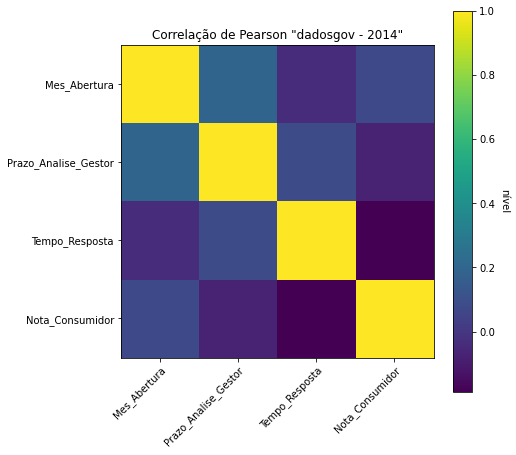

In [ ]:
#Realizando filtro

columns = ['Mes_Abertura', 'Prazo_Analise_Gestor', 'Tempo_Resposta', 'Nota_Consumidor']

#Caluculo de correlação de pearson

corrs = df_gov[['Mes_Abertura', 'Prazo_Analise_Gestor', 'Tempo_Resposta', 'Nota_Consumidor']].corr().values

fid, ax = plt.subplots(figsize = [7, 7])

#criando a imagem da matriz de correlação
im = ax.imshow(corrs)

#Costumizando o gráfico

#Nomeando as colunas no eixo x e y:

ax.set_xticks(np.arange(len(columns))) #Nesse ponto definimos o número de itens no eixo
ax.set_yticks(np.arange(len(columns)))
ax.set_xticklabels(columns) #Nomeando os itens do eixo x
ax.set_yticklabels(columns) #Nomeando os itens do eixo y

#Rotecionando os rótulos do eixo X

plt.setp(ax.get_xticklabels(), rotation = 45, ha = 'right', rotation_mode = 'anchor')

#Título do gráfico
ax.set_title('Correlação de Pearson "dadosgov - 2014"')

#Criando barra lateral para servi de legenda
cbar = ax.figure.colorbar(im, ax = ax)
cbar.ax.set_ylabel('nível', rotation = -90, va = 'bottom')
plt.show()


- De acordo com os dados analisados o __tempo de resposta__ não tem uma correlação forte com a **nota do consumidor**, porém, nota-se que __mês de abertura__ tem uma correlação forte com a variável **nota do consumidor**.
***

<a id="s9"> <h2>4 - Proporção de reclamações registradas e não respondidas.</h2></a>

   - Calcular a proporção (porcentagem) do total de reclamações registradas que não foram respondidas.

In [ ]:
df_gov.columns

Index(['Gestor', 'Canal_Origem', 'Regiao', 'UF', 'Cidade', 'Sexo',
       'Faixa_Etaria', 'Ano_Abertura', 'Mes_Abertura', 'Data_Abertura',
       'Hora_Abertura', 'Data_Resposta', 'Hora_Resposta', 'Data_Analise',
       'Hora Análise', 'Data_Recusa', 'Hora_Recusa', 'Data_Finalizacao',
       'Hora_Finalizacao', 'Prazo_Resposta', 'Prazo_Analise_Gestor',
       'Tempo_Resposta', 'Nome_Fantasia', 'Segmento_Mercado', 'Area',
       'Assunto', 'Grupo_Problema', 'Problema', 'Forma_de_Compra_Contrato',
       'Procurou_Empresa', 'Respondida', 'Situacao', 'Avaliacao_Reclamacao',
       'Nota_Consumidor', 'Analise_Recusa', 'Edição de Conteúdo',
       'Interacao_Gestor', 'Total'],
      dtype='object')

In [ ]:
df_gov.Respondida.value_counts()

S    41961
N     2026
Name: Respondida, dtype: int64

In [ ]:
df_resp = df_gov.groupby(['Total']).apply(lambda x: x.Respondida.value_counts()).unstack()

df_resp_pro = df_gov.groupby('Total').apply(lambda x: x.Respondida.value_counts()/x.shape[0]*100).unstack()

print(df_resp)
print('-'*100)
print(df_resp_pro)

Respondida  Total
S           1        41961
N           1         2026
dtype: int64
----------------------------------------------------------------------------------------------------
Respondida  Total
S           1        95.394094
N           1         4.605906
dtype: float64


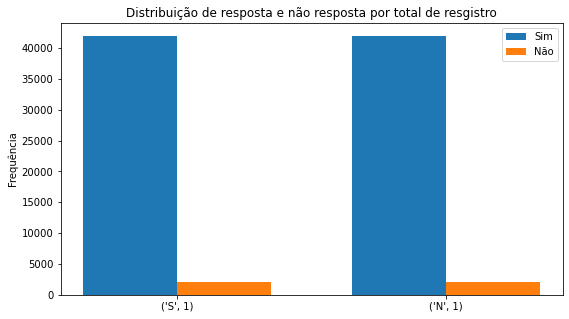

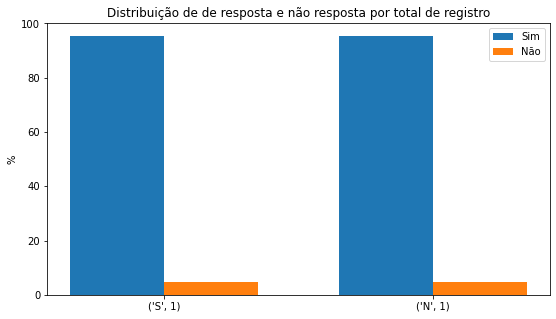

In [ ]:
#Gerando gráfico que apresenta os resultados de absolutos e relativos

df_resp = df_gov.groupby(['Total']).apply(lambda x: x.Respondida.value_counts()).unstack() #frequencia absoluta

df_resp_pro = df_gov.groupby('Total').apply(lambda x: x.Respondida.value_counts()/x.shape[0]*100).unstack() #frequencia relativa

labels = list(df_resp.index) #labels do gráfico  de barras

sim = df_resp['S'].values #Valores de quem foi respondido para o gráfico de barras
nao = df_resp['N'].values #valores de quem não foi respondido para o gráfico de barras

sim_pro = df_resp_pro['S'].values 
nao_pro = df_resp_pro['N'].values 

x = np.arange(len(labels)) #Localização dos labels
width = 0.35 #largura das barras

fig, ax = plt.subplots(figsize = [9, 5]) #construção de fame, criando figura de eixos

rects1 = ax.bar(x - width/2, sim, width, label = 'Sim') #Valores para construção do gráfico de barras morreram
rects2 = ax.bar(x + width/2, nao, width, label = 'Não') #para cosntrução do gráfico de barras sobreviveram 

#Criando titulo, legenda nos eixos e no gráfico
ax.set_title('Distribuição de resposta e não resposta por total de resgistro')
ax.set_ylabel('Frequência') #Legenda de y
ax.set_xticks(x) #set a posição das labels
ax.set_xticklabels(labels) #Legenda dos label do eixo x
ax.legend() #Legenda do gráfico
plt.show()

fig, ax1 = plt.subplots(figsize = [9, 5])
rects3 = ax1.bar(x - width/2, sim_pro, width, label = 'Sim')
rects4 = ax1.bar(x + width/2, nao_pro, width, label = 'Não')

ax1.set_title('Distribuição de de resposta e não resposta por total de registro')
ax1.set_ylabel('%')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
plt.show()

***
- A proporção % do total de reclamações registras não respondidas é de aproximadamente 4.60% o que pode ser considerado um bom aproveitamento, com relação ao valor global

***
<a id="s10"> <h2>5 -  Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las.</h2></a>

- Proponha outras hipóteses e verifique-as (no mínimo duas).

__Análises pensadas__:
   - Para realizar uma análise que visa entender a satisfação do cliente, acredita-se que seria bom entender a relação entre o Avaliação da Reclamação e Nota do Consumidor.
   - Outra análise interessante é entender o comportamento do tempo de resposta e o Sexo do cliente que estabelaceu a reclamação.
   - Realizar uma analise entre o Sexo do cliente que realizou a reclamação e a nota do consumidor
   - Como é o comportamento da variavel Avaliação e Reclamação relacionado a variável respondida
   - Análisar se existe o segmento mais problematico em relação a nota/satisfação do cliente.
   - Entender se as notas do consumidor estão consentradas em uma região especifica do País.
***

In [ ]:
df_gov.columns

Index(['Gestor', 'Canal_Origem', 'Regiao', 'UF', 'Cidade', 'Sexo',
       'Faixa_Etaria', 'Ano_Abertura', 'Mes_Abertura', 'Data_Abertura',
       'Hora_Abertura', 'Data_Resposta', 'Hora_Resposta', 'Data_Analise',
       'Hora Análise', 'Data_Recusa', 'Hora_Recusa', 'Data_Finalizacao',
       'Hora_Finalizacao', 'Prazo_Resposta', 'Prazo_Analise_Gestor',
       'Tempo_Resposta', 'Nome_Fantasia', 'Segmento_Mercado', 'Area',
       'Assunto', 'Grupo_Problema', 'Problema', 'Forma_de_Compra_Contrato',
       'Procurou_Empresa', 'Respondida', 'Situacao', 'Avaliacao_Reclamacao',
       'Nota_Consumidor', 'Analise_Recusa', 'Edição de Conteúdo',
       'Interacao_Gestor', 'Total'],
      dtype='object')

***
##### A Avaliação da reclamação esta realcionada com a variavel resposta ou nota do consumidor?

- Essa avliação pode mostrar a relação de satisfação do consumidor com base no status da sua reclamação.

In [ ]:
df_gov.Avaliacao_Reclamacao.value_counts()

Resolvida        17427
Não Avaliada     13526
Não Resolvida    11200
Name: Avaliacao_Reclamacao, dtype: int64

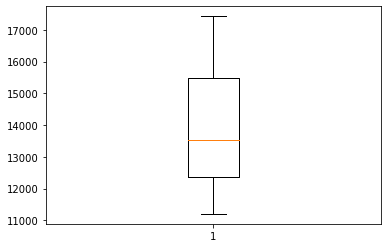

In [ ]:
plt.boxplot(df_gov.Avaliacao_Reclamacao.value_counts())
plt.show()

In [ ]:
df_NC = df_gov.groupby(['Avaliacao_Reclamacao']).apply(lambda x: x.Nota_Consumidor.value_counts()).unstack()

df_NC_pro = df_gov.groupby('Avaliacao_Reclamacao').apply(lambda x: x.Nota_Consumidor.value_counts()/x.shape[0]*100).unstack()

print(df_NC)
print('-'*100)
print(df_NC_pro)

                       1.0  2.0   3.0   4.0   5.0
Avaliacao_Reclamacao                             
Não Resolvida         8571  964   929   319   417
Resolvida             1333  914  2818  3990  8372
----------------------------------------------------------------------------------------------------
                            1.0       2.0        3.0        4.0        5.0
Avaliacao_Reclamacao                                                      
Não Resolvida         76.526786  8.607143   8.294643   2.848214   3.723214
Resolvida              7.649050  5.244735  16.170310  22.895507  48.040397


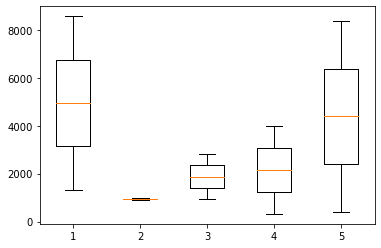

In [ ]:
plt.boxplot(df_NC)
plt.show()

###### A Variavel avaliação da reclamação assim como esperado esta altamente ligada a nota do cliente com base em seu status

- As maiores notas de status 1 foram para as reclamações Não resolvida cerca de 76.52% desse status

- Já as maiores notas de status 5 foram para as reclamações Resolvida cerca de 48.04% desse status

***
#### Como é o comportamento dessa analise de acordo com o Sexo?

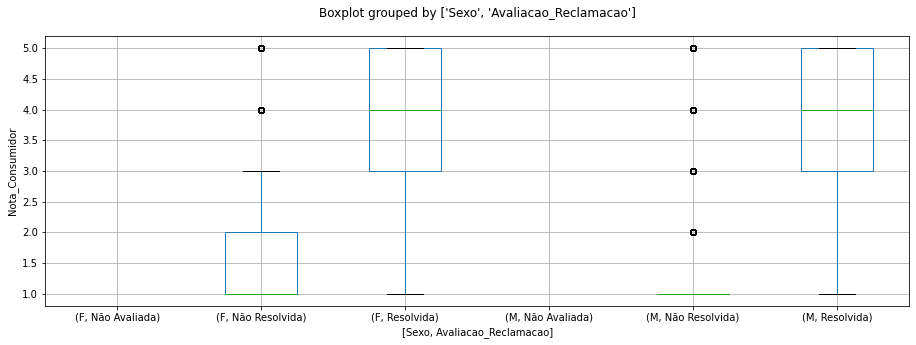

In [ ]:
df_gov.boxplot('Nota_Consumidor', by = ['Sexo', 'Avaliacao_Reclamacao'], figsize = [15, 5])
plt.ylabel('Nota_Consumidor')
plt.title('')
plt.show()


- De acordo com a análise as mulheres tendem a realizar pontuações de 1 a 2 quando o a avaliação é Não Resolvida, em quanto os homens tendem a fazer pontuações 1 par ao memso status, já para as reclamações respondidas as pontuações são muito semelhantes variando de 3 até 5 sendo a média a pontuação 4.
***

#### Como é o comportamento da variavel Avaliação e Reclamação relacionado a variável respondida

In [ ]:
df_resolv = df_gov.groupby(['Avaliacao_Reclamacao']).apply(lambda x: x.Respondida.value_counts()).unstack()

df_resolv_pro = df_gov.groupby('Avaliacao_Reclamacao').apply(lambda x: x.Respondida.value_counts()/x.shape[0]*100).unstack()

print(df_resolv)
print('-'*100)
print(df_resolv_pro)

Respondida  Avaliacao_Reclamacao
S           Não Avaliada            13426
            Não Resolvida           11121
            Resolvida               17391
N           Não Avaliada              100
            Não Resolvida              79
            Resolvida                  36
dtype: int64
----------------------------------------------------------------------------------------------------
Respondida  Avaliacao_Reclamacao
S           Não Avaliada            99.260683
            Não Resolvida           99.294643
            Resolvida               99.793424
N           Não Avaliada             0.739317
            Não Resolvida            0.705357
            Resolvida                0.206576
dtype: float64


- Como é possivel observa menos de 1% compõe o status não respondido o que significa que segundo os dados de 2014 reflete um bom atendimento ao cliente.

In [ ]:
df_SM = df_gov.groupby(['Avaliacao_Reclamacao']).apply(lambda x: x.Segmento_Mercado.value_counts()).unstack()

df_SM_pro = df_gov.groupby('Avaliacao_Reclamacao').apply(lambda x: x.Segmento_Mercado.value_counts()/x.shape[0]*100).unstack()

In [ ]:
df_SM.count()

Administradoras de Consórcios                                              3
Agências de Viagens                                                        3
Artigos Esportivos                                                         3
Bancos de Dados e Cadastros de Consumidores                                3
Bancos, Financeiras e Administradoras de Cartão                            3
Comércio Eletrônico                                                        3
Corretoras e Sociedades de Seguros, Capitalização e Previdência            3
Editoras                                                                   2
Empresas de Pagamento Eletrônico                                           3
Empresas de Recuperação de Crédito                                         3
Energia Elétrica, Gás, Água e Esgoto                                       3
Estabelecimentos de Ensino                                                 1
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática      3

In [ ]:
df_SM_pro

,Administradoras de Consórcios,Agências de Viagens,Artigos Esportivos,Bancos de Dados e Cadastros de Consumidores,"Bancos, Financeiras e Administradoras de Cartão",Comércio Eletrônico,"Corretoras e Sociedades de Seguros, Capitalização e Previdência",Editoras,Empresas de Pagamento Eletrônico,Empresas de Recuperação de Crédito,...,Farmácias,Operadoras de Planos de Saúde e Administradoras de Benefícios,"Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)","Perfumaria, Cosméticos e Higiene Pessoal",Programas de Fidelidade,Provedores de Conteúdo e Outros Serviços na Internet,Supermercados,Transporte Aéreo,Transporte Terrestre,Varejo
Avaliacao_Reclamacao,,,,,,,,,,,,,,,,,,,,,
Não Avaliada,0.369658,0.613633,0.014786,0.036966,21.418010,14.069200,0.983291,0.007393,0.059145,0.088718,...,0.022180,0.687565,52.373207,0.066539,0.125684,0.014786,0.613633,1.101582,0.007393,2.535857
Não Resolvida,0.276786,1.116071,0.017857,0.080357,18.714286,17.526786,0.973214,0.008929,0.080357,0.089286,...,0.026786,0.848214,51.294643,0.026786,0.098214,NaN,0.383929,1.098214,NaN,1.526786
Resolvida,0.275435,0.613990,0.011476,0.022953,16.440007,11.677282,0.613990,NaN,0.028691,0.103288,...,0.022953,0.304126,61.353073,0.126241,0.154932,0.017215,0.390199,0.843519,NaN,2.117404


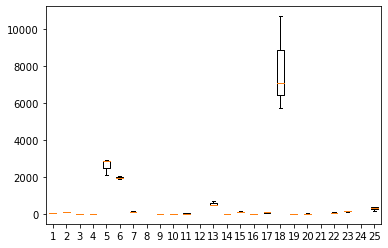

In [ ]:
plt.boxplot(df_SM)
plt.show()

Bem de acordo com os dados o segmento que mais se destaca é **Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)** que a média de reclamação esta em torno de 7000, representa aproximadamente 51% em relação ao status não resolvida, mas, com o status Resilvido representa mais de 61% desse status, em segundo e terceiro lugar de forma respectiva, estão os segmentos de **Bancos, Financeiras e Administradoras de Cartão** e **Comércio Eletrônico** que não tem mais de 4000 reclamações cada um.
***

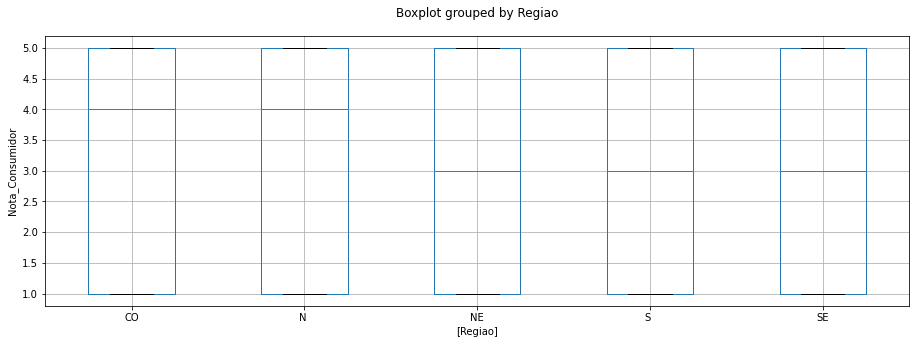

In [ ]:
df_gov.boxplot('Nota_Consumidor', by = ['Regiao'], figsize = [15, 5])
plt.ylabel('Nota_Consumidor')
plt.title('')
plt.show()

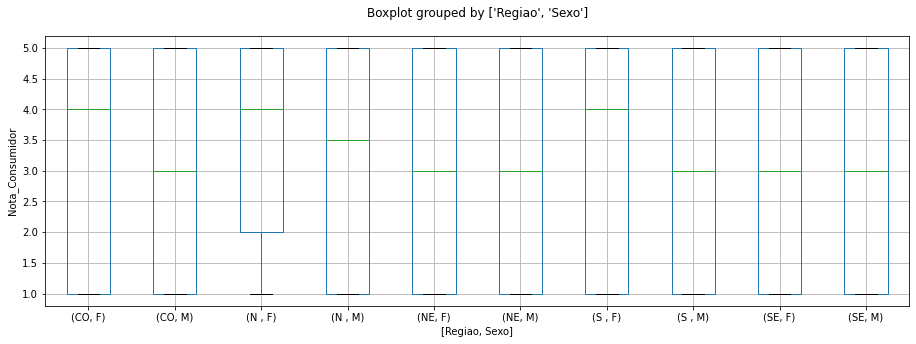

In [ ]:
df_gov.boxplot('Nota_Consumidor', by = ['Regiao', 'Sexo'], figsize = [15, 5])
plt.ylabel('Nota_Consumidor')
plt.title('')
plt.show()

Com relação a região a média de nota do consumidor é __4__ para a __região Centro Oeste - CO__ e __Norte - N__, já para as regiões __Sul - S, Sudeste - SE e Nordeste - NE__ a média de notas do consumidor é de __3__

Quando inserimos a variável Sexo nessa mesma avaliação nota-se que os __homens = M__ possuém uma tendencia a dar notas mais baixar __(3.0 ou 3.5)__ que as __mulheres = F__, no caso das regiões __CO__ e __S__ que tem a média de nota 4.0 para F.

Nas outras regiões as mulheres tem um comportamento semelhante as avaliações dos homens
***

Existem varias outras analises que podem refletir a qualidade do atendimento e serviço fornecido, porém, acredita-se que a nota do consumidor, é um importante fator para entender as outras variaveis.